In [1]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

np.random.seed(seed=42)

# for saving files
saving_activated = False

# Part I: Indicator functions and least square fitting for classification

In [2]:
#Load some real data and check some statistics
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data)
y = (iris_dataset.target)
classes = list(set(y))

[(0, (0.6, 0.30980392156862746, 0.6313725490196078)), (1, (1.0, 0.5058823529411764, 0.00392156862745098)), (2, (0.9921568627450981, 0.9882352941176471, 0.2))]
{0: (0.6, 0.30980392156862746, 0.6313725490196078), 1: (1.0, 0.5058823529411764, 0.00392156862745098), 2: (0.9921568627450981, 0.9882352941176471, 0.2)}


<IPython.core.display.Javascript object>


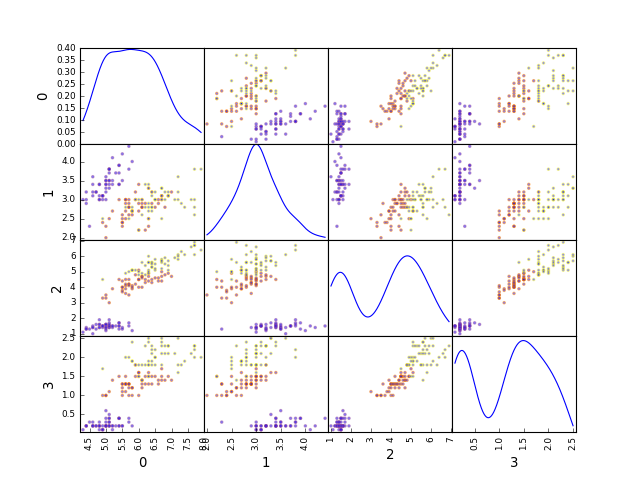

In [3]:
palette = [(153. / 255, 79. / 255, 161. / 255),
           (255. / 255, 129. / 255, 1. / 255),
           (253. / 255, 252. / 255, 51. / 255)]  # HEXA

color_map = dict(zip(classes, palette))

print zip(classes,palette)
print color_map
colors = [color_map[y[i]] for i in xrange(len(y))]
axeslist = pd.scatter_matrix(X, color=colors, diagonal='kde')

In [50]:
regr_0 = LinearRegression()
regr_1 = LinearRegression()
regr_2 = LinearRegression()

# Classes are 0, 1 and 2
indexes_0 = np.squeeze(np.argwhere(y == 0))
y_0 = np.zeros(y.shape,)
y_0[indexes_0] = 1

indexes_1 = np.squeeze(np.argwhere(y == 1))
y_1 = np.zeros(y.shape)
y_1[indexes_1] = 1

indexes_2 = np.squeeze(np.argwhere(y == 2))
y_2 = np.zeros(y.shape)
y_2[indexes_2] = 1

x_to_class = np.array([4.9, 3.1, 1.5, 0.1])
x_to_class = x_to_class.reshape(1, -1)

regr_0 = regr_0.fit(X, y_0)
a_0 = regr_0.predict(x_to_class)

regr_1 = regr_1.fit(X, y_1)
a_1 = regr_1.predict(x_to_class)

regr_2 = regr_1.fit(X, y_2)
a_2 = regr_2.predict(x_to_class)

# Probatilities by class:
prob_by_classes = [a_0[0], a_1[0], a_2[0]]
print prob_by_classes

# Note that it can weirdly be a negative value, ie you estimate a probability
# by a negative number

print 'The winner is class ' + \
    str(np.argmax([a_0[0], a_1[0], a_2[0]])) + ', for x_to_class=' + str(x_to_class)

print "the sum of the weights is " + str(np.sum(prob_by_classes))

print regr_0.coef_
print regr_0.intercept_
print regr_1.coef_
print regr_1.intercept_
print regr_2.coef_
print regr_2.intercept_



[0.85530959315679622, 0.37068388858961865, -0.22599348174641509]
The winner is class 0, for x_to_class=[[ 4.9  3.1  1.5  0.1]]
the sum of the weights is 1.0
[ 0.06564305  0.242473   -0.22276138 -0.06335141]
0.122469540772
[-0.04409841  0.19823256  0.00424001  0.54654271]
-0.6854464644
[-0.04409841  0.19823256  0.00424001  0.54654271]
-0.6854464644


In [4]:
# TODO remove the warning above

## Exercise : compare with the constant variable removed from the fitting

In [12]:
# TODO
regr_0 = LinearRegression(fit_intercept=False)
regr_1 = LinearRegression(fit_intercept=False)
regr_2 = LinearRegression(fit_intercept=False)

# Classes are 0, 1 and 2
indexes_0 = np.squeeze(np.argwhere(y == 0))
y_0 = np.zeros(y.shape,)
y_0[indexes_0] = 1

indexes_1 = np.squeeze(np.argwhere(y == 1))
y_1 = np.zeros(y.shape)
y_1[indexes_1] = 1

indexes_2 = np.squeeze(np.argwhere(y == 2))
y_2 = np.zeros(y.shape)
y_2[indexes_2] = 1

x_to_class = np.array([4.9, 3.1, 1.5, 0.1])
x_to_class = x_to_class.reshape(1, -1)

regr_0 = regr_0.fit(X, y_0)
a_0 = regr_0.predict(x_to_class)

regr_1 = regr_1.fit(X, y_1)
a_1 = regr_1.predict(x_to_class)

regr_2 = regr_1.fit(X, y_2)
a_2 = regr_2.predict(x_to_class)

# Probatilities by class:
prob_by_classes = [a_0[0], a_1[0], a_2[0]]
print prob_by_classes

# Note that it can weirdly be a negative value, ie you estimate a probability
# by a negative number

print 'The winner is class ' + \
    str(np.argmax([a_0[0], a_1[0], a_2[0]])) + ', for x_to_class=' + str(x_to_class)

print "the sum of the weights is " + str(np.sum(prob_by_classes))


[0.85044983065319246, 0.3086627803242139, -0.1987940082698616]
The winner is class 0, for x_to_class=[[ 4.9  3.1  1.5  0.1]]
the sum of the weights is 0.960318602708


## Exercise : write a function taking a data sets with label between 0 and K-1 implementing the method above

classi_ind_regr

input   : x_to_class, X, y, K=3

output  :label_pred, proba_vector

In [15]:
#TODO
def indicator_regression(X,y,K,x_to_class):
    x_to_class = np.reshape(x_to_class,(1,-1))
    prob_by_classes = np.zeros(K)
    for k in np.arange(K):
        y_k = np.zeros_like(y)
        y_k[y==k]=1
        regr_k = LinearRegression()
        regr_k.fit(X,y_k)
        prob_by_classes[k] = regr_k.predict(x_to_class)
    label_predicted = np.argmax(prob_by_classes)
    return label_predicted, prob_by_classes
    
label_predicted,prob_by_classes = indicator_regression(X,y,3,np.array([4.9, 3.1, 1.5, 0.1]))
print 'the winner is class ' + \
        str(label_predicted) + ', for x_to_class=' + str(x_to_class)
        
print 'the sum of the weights is ' + str(np.sum(prob_by_classes))   

    

the winner is class 0, for x_to_class=[[ 4.9  3.1  1.5  0.1]]
the sum of the weights is 1.0


## Simulated toy example:

In [16]:
n_samples = 100
X = np.zeros([3 * n_samples, 2])
mean_0 = [1, 1]
mean_1 = [2, 2]
mean_2 = [3, 3]
noise_level = 0.20
cov = noise_level * noise_level * np.array([[1, 0], [0, 1]])
X[0:n_samples, ] = np.random.multivariate_normal(mean_0, cov, n_samples)
X[n_samples: 2 * n_samples, ] = np.random.multivariate_normal(mean_1,
                                                              cov, n_samples)
X[2 * n_samples:3 * n_samples, ] = np.random.multivariate_normal(mean_2, cov,
                                                                 n_samples)
y = np.zeros(3 * n_samples,)
y[n_samples:2 * n_samples] = 1
y[2 * n_samples:3 * n_samples, ] = 2

<IPython.core.display.Javascript object>


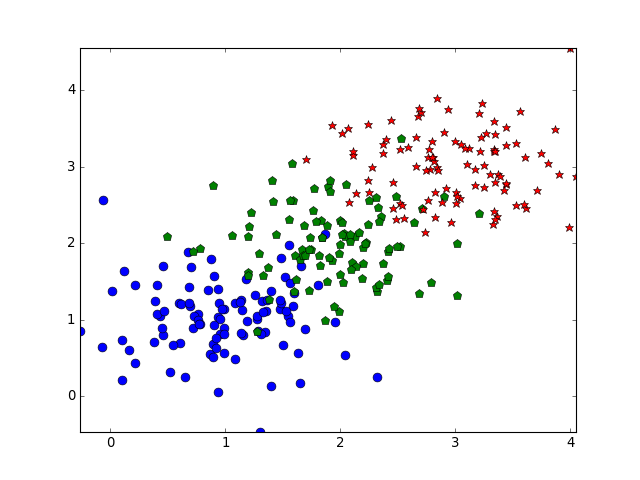

In [57]:
import matplotlib.pyplot as plt
from module5_source import (classi_ind_regr, plot_2d, frontiere)

fig1 = plt.figure()
plot_2d(X, y)
plt.show()

display_1 = np.array([2, 2])
display_2 = np.array([3, 1])
display_2bis = np.array([3, 3])
display_2ter = np.array([1.5, 2.5])
display_2quad = np.array([1.5, 2])


In [58]:
class1,values_proba1 = classi_ind_regr(display_1, X, y, k=3)
class2,values_proba2 = classi_ind_regr(display_2, X, y, k=3)
class2bis,values_proba2bis = classi_ind_regr(display_2bis, X, y, k=3)
class2ter,values_proba2ter = classi_ind_regr(display_2ter, X, y, k=3)
class2quad,values_proba2quad = classi_ind_regr(display_2quad, X, y, k=3)

<IPython.core.display.Javascript object>


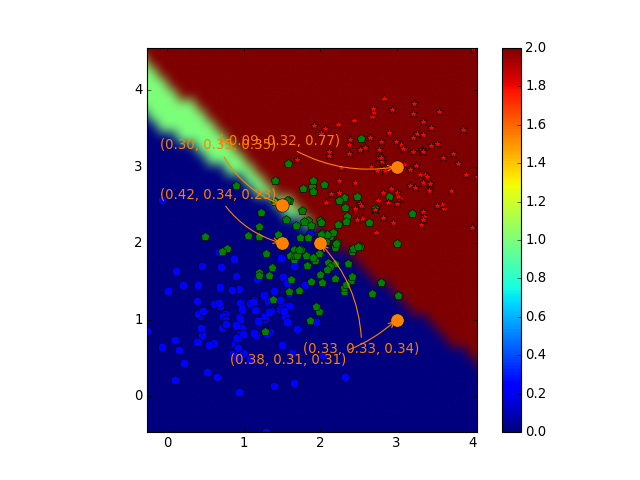

In [59]:
color_text = '#ff8101'
plt.figure()
plot_2d(X, y)
resolution_param = 50  # 500 for nice plotting, 50 for fast version
frontiere(lambda xx: classi_ind_regr(np.reshape(xx,(1,-1)), X, y, k=3)[0], X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba1[0] + ', %.2f' % values_proba1[1] +
             ', %.2f)' % values_proba1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-15, -99), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2[0] + ', %.2f' % values_proba2[1] +
             ', %.2f)' % values_proba2[2], xy=(display_2[0], display_2[1]),
             xycoords='data', color =color_text, xytext=(-150, -40),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2bis[0] + ', %.2f'
             % values_proba2bis[1] + ', %.2f)' % values_proba2bis[2],
             xy=(display_2bis[0], display_2bis[1]), xycoords='data',
             color =color_text, xytext=(-160, 20), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2bis[0], display_2bis[1], 'o',
         color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2ter[0] + ', %.2f'
             % values_proba2ter[1] + ', %.2f)' % values_proba2ter[2],
             xy=(display_2ter[0], display_2ter[1]), xycoords='data',
             color=color_text, xytext=(-110, 50), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2ter[0], display_2ter[1], 'o', color=color_text,
         markersize=12)


plt.annotate(r'' + '(%.2f' % values_proba2quad[0] + ', %.2f'
             % values_proba2quad[1] + ', %.2f)' % values_proba2quad[2],
             xy=(display_2quad[0], display_2quad[1]), xycoords='data',
             color =color_text, xytext=(-110, 40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2quad[0], display_2quad[1], 'o',
         color=color_text, markersize=12)
plt.draw()
plt.show()

## Plotting the underlying distribution: mixture of Gaussian

<IPython.core.display.Javascript object>


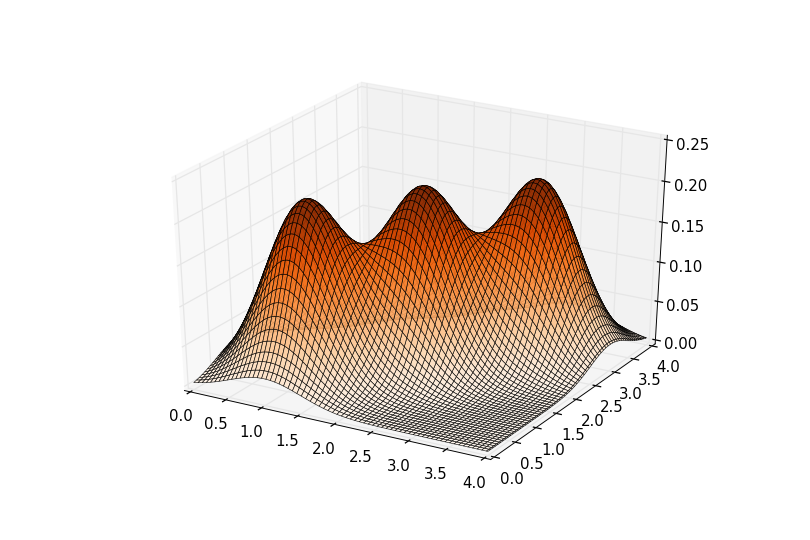

<IPython.core.display.Javascript object>


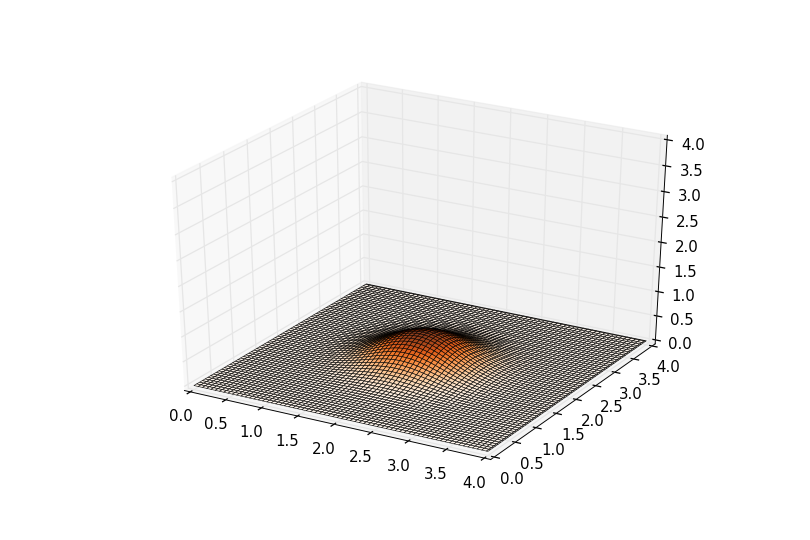

<IPython.core.display.Javascript object>


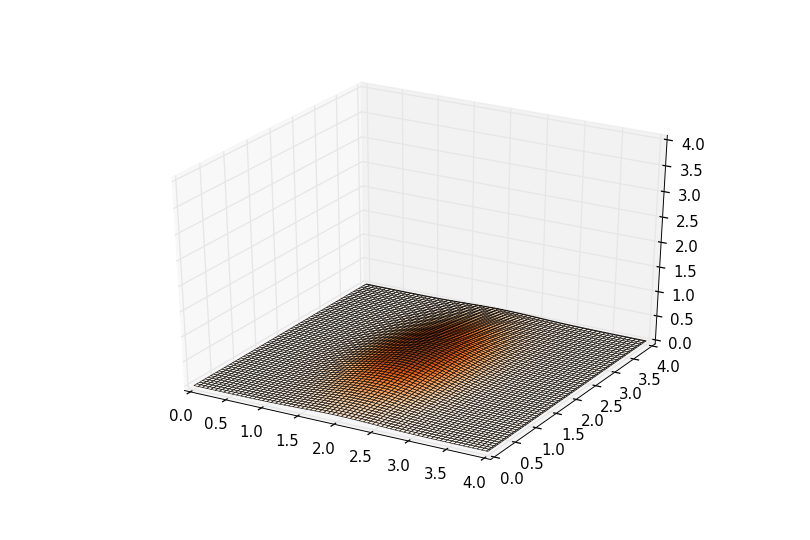

<IPython.core.display.Javascript object>


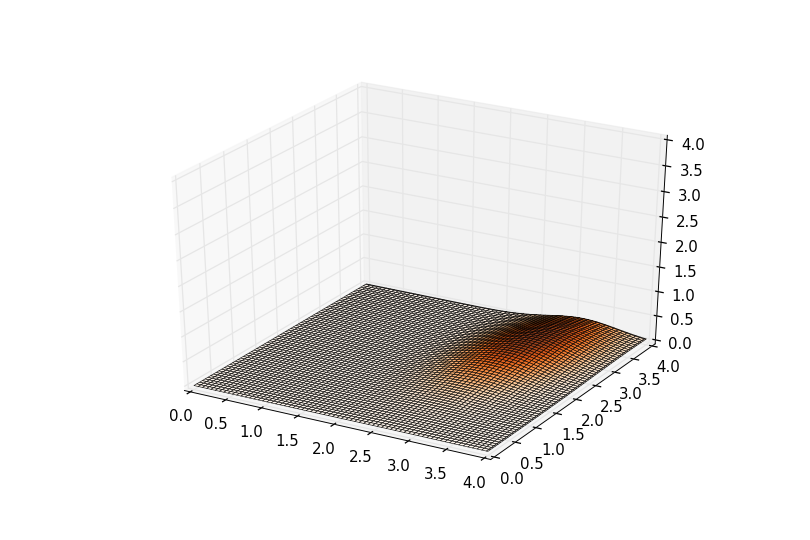

In [60]:
step = 200
xx = np.linspace(0, 4, step)
yy = xx
Xg, Yg = np.meshgrid(xx, yy)
Z1 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
                                mux=mean_0[0], muy=mean_0[1], sigmaxy=0.0)
Z2 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
                                mux=mean_1[0], muy=mean_1[1], sigmaxy=0.0)
Z3 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
                               mux=mean_2[0], muy=mean_2[1], sigmaxy=0.0)

fig3 = plt.figure(figsize=(9, 6), dpi = 90)
ax = fig3.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, (Z1 + Z2 + Z3) / 3, cmap='Oranges',
                 rstride=3, cstride=3, alpha=0.9, linewidth=0.5)
plt.show()


Z2 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
                                sigmay=noise_level, mux=mean_1[0],
                                muy=mean_1[1], sigmaxy=0.0)

fig3_bis = plt.figure(figsize=(9, 6), dpi = 90)
ax = fig3_bis.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z2, cmap='Oranges', rstride=3, cstride=3,
                 alpha=0.9, linewidth=0.5)
ax.set_zlim(0, 4)
plt.show()


Z3 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
                                sigmay=2 * noise_level, mux=mean_1[0],
                                muy=mean_1[1], sigmaxy=0.0)


fig3_ter = plt.figure(figsize=(9, 6), dpi = 90)
ax = fig3_ter.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z3, cmap='Oranges', rstride=3, cstride=3,
                alpha=0.9, linewidth=0.5)
ax.set_zlim(0, 4)
plt.show()


Z4 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
                                sigmay=noise_level * 2,
                                mux=mean_2[0], muy=mean_2[1],
                                sigmaxy=noise_level ** 2 / 2)

fig3_quart = plt.figure(figsize=(9, 6), dpi = 90)
ax = fig3_quart.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z4, cmap='Oranges', rstride=3, cstride=3,
                 alpha=0.9, linewidth=0.5)
ax.set_zlim(0, 4)
plt.show()

#  Exo : Investigate the influence of noise_level on the previous method

<IPython.core.display.Javascript object>


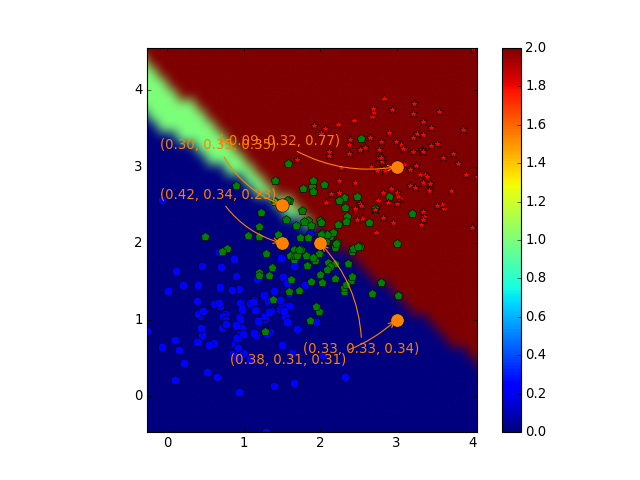

In [24]:
# TODO
n_samples = 100
X = np.zeros([3 * n_samples, 2])
mean_0 = [1, 1]
mean_1 = [2, 2]
mean_2 = [3, 3]
noise_level = 0.50
cov = noise_level * noise_level * np.array([[1, 0], [0, 1]])
X[0:n_samples, ] = np.random.multivariate_normal(mean_0, cov, n_samples)
X[n_samples: 2 * n_samples, ] = np.random.multivariate_normal(mean_1,
                                                              cov, n_samples)
X[2 * n_samples:3 * n_samples, ] = np.random.multivariate_normal(mean_2, cov,
                                                                 n_samples)
y = np.zeros(3 * n_samples,)
y[n_samples:2 * n_samples] = 1
y[2 * n_samples:3 * n_samples, ] = 2

values_proba1 = classi_ind_regr(display_1, X, y, k=3)[1]
values_proba2 = classi_ind_regr(display_2, X, y, k=3)[1]
values_proba2bis = classi_ind_regr(display_2bis, X, y, k=3)[1]
values_proba2ter = classi_ind_regr(display_2ter, X, y, k=3)[1]
values_proba2quad = classi_ind_regr(display_2quad, X, y, k=3)[1]

color_text = '#ff8101'
plt.figure()
plot_2d(X, y)
resolution_param = 50  # 500 for nice plotting, 50 for fast version
frontiere(lambda xx: classi_ind_regr(np.reshape(xx,(1,-1)), X, y, k=3)[0], X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba1[0] + ', %.2f' % values_proba1[1] +
             ', %.2f)' % values_proba1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-15, -99), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2[0] + ', %.2f' % values_proba2[1] +
             ', %.2f)' % values_proba2[2], xy=(display_2[0], display_2[1]),
             xycoords='data', color =color_text, xytext=(-150, -40),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2bis[0] + ', %.2f'
             % values_proba2bis[1] + ', %.2f)' % values_proba2bis[2],
             xy=(display_2bis[0], display_2bis[1]), xycoords='data',
             color =color_text, xytext=(-160, 20), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2bis[0], display_2bis[1], 'o',
         color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2ter[0] + ', %.2f'
             % values_proba2ter[1] + ', %.2f)' % values_proba2ter[2],
             xy=(display_2ter[0], display_2ter[1]), xycoords='data',
             color=color_text, xytext=(-110, 50), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2ter[0], display_2ter[1], 'o', color=color_text,
         markersize=12)


plt.annotate(r'' + '(%.2f' % values_proba2quad[0] + ', %.2f'
             % values_proba2quad[1] + ', %.2f)' % values_proba2quad[2],
             xy=(display_2quad[0], display_2quad[1]), xycoords='data',
             color =color_text, xytext=(-110, 40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2quad[0], display_2quad[1], 'o',
         color=color_text, markersize=12)
plt.draw()
plt.show()

# Part II : Linear Discriminant Analysis (LDA)

In [55]:
from sklearn.lda import LDA
clf = LDA()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])
values_proba_lda_1 = np.exp(clf.predict_log_proba(display_1))[0]
values_proba_lda_2 = np.exp(clf.predict_log_proba(display_2))[0]
values_proba_lda_3 = np.exp(clf.predict_log_proba(display_3))[0]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<IPython.core.display.Javascript object>


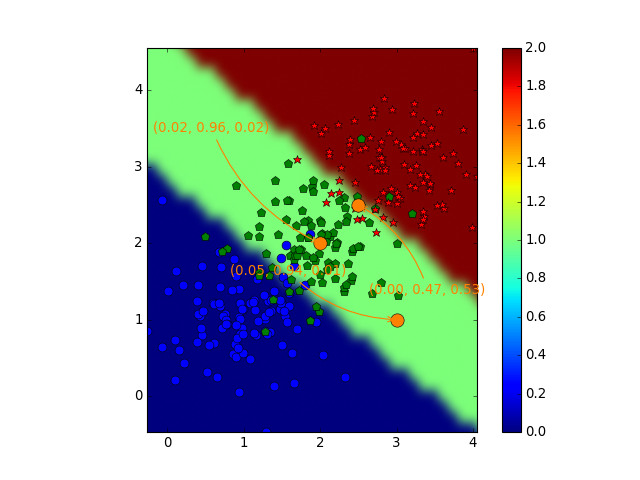

2.5


In [61]:
fig2 = plt.figure()
plot_2d(X, y)
resolution_param = 50  # 500 for nice plotting, 50 for fast version
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_lda_1[0] + ', %.2f'
             % values_proba_lda_1[1] + ', %.2f)' % values_proba_lda_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, 100), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))


plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba_lda_2[0] + ', %.2f'
             % values_proba_lda_2[1] + ', %.2f)' % values_proba_lda_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, 40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))


plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)

print display_3[0]
plt.annotate(r'' + '(%.2f' % values_proba_lda_3[0] + ', %.2f'
             % values_proba_lda_3[1] + ', %.2f)' % values_proba_lda_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

# Part III : Quadratic Discriminant Analysis (QDA)

<IPython.core.display.Javascript object>


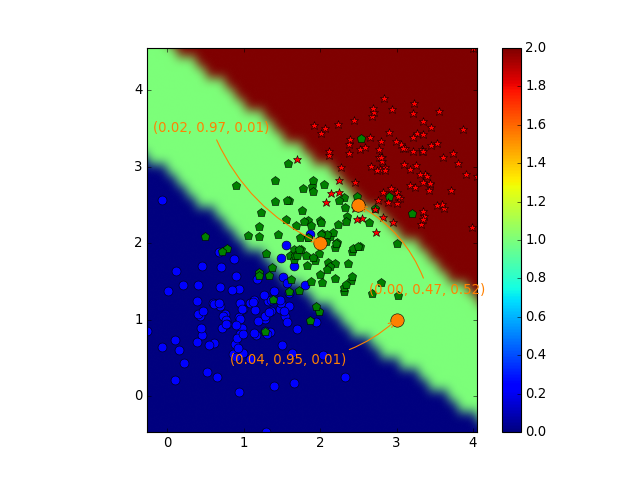

In [66]:
from sklearn.qda import QDA
clf = QDA()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])
values_proba_qda_1 = np.exp(clf.predict_log_proba(display_1.reshape(1,-1)))[0]
values_proba_qda_2 = np.exp(clf.predict_log_proba(display_2.reshape(1,-1)))[0]
values_proba_qda_3 = np.exp(clf.predict_log_proba(display_3.reshape(1,-1)))[0]

fig3 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_qda_1[0] + ', %.2f'
             % values_proba_qda_1[1] + ', %.2f)' % values_proba_qda_1[2],
             xy=(display_1[0], display_1[0]), xycoords='data',
             color=color_text, xytext=(-150, +100), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_qda_2[0] + ', %.2f'
             % values_proba_qda_2[1] + ', %.2f)' % values_proba_qda_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_qda_3[0] + ', %.2f'
             % values_proba_qda_3[1] + ', %.2f)' % values_proba_qda_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()


## EXERCICE: Test QDA vs LDA for the IRIS dataset, using training/testing set with ratio 80%/20%. 

In [68]:
# Hint: consider the train_test_split in sklearn
from sklearn import cross_validation

lda_clf = LDA()
qda_clf = QDA()
scores_lda = cross_validation.cross_val_score(lda_clf, X, y, cv=5)
scores_qda = cross_validation.cross_val_score(qda_clf, X, y, cv=5)
print 'LDA cross validation : mean error '+str(np.mean(scores_lda))+' with variance '+str(np.std(scores_lda))
print 'QDA cross validation : mean error '+str(np.mean(scores_qda))+' with variance '+str(np.std(scores_qda))

LDA cross validation : mean error 0.896666666667 with variance 0.0286744175568
QDA cross validation : mean error 0.886666666667 with variance 0.0266666666667


# Part IV: Gaussian Naive Bayes

/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

<IPython.core.display.Javascript object>


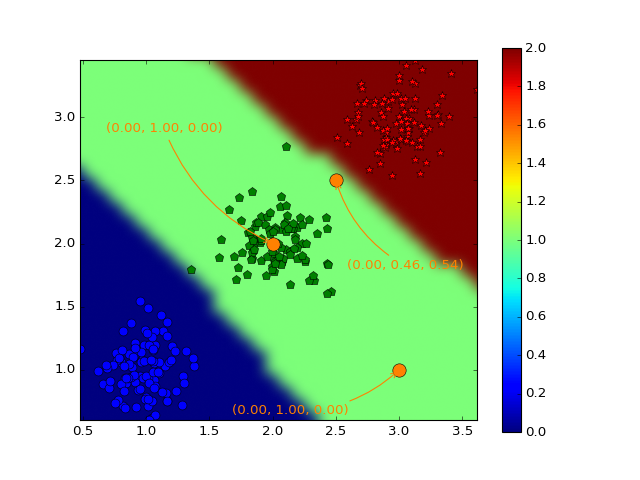

In [71]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

values_proba_gnb_1 = np.exp(clf.predict_log_proba(display_1))[0]
values_proba_gnb_2 = np.exp(clf.predict_log_proba(display_2))[0]
values_proba_gnb_3 = np.exp(clf.predict_log_proba(display_3))[0]

fig1_bis = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_1[0] + ', %.2f'
             % values_proba_gnb_1[1] + ', %.2f)' % values_proba_gnb_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, +100),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",
                             color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_2[0] + ', %.2f'
             % values_proba_gnb_2[1] + ', %.2f)' % values_proba_gnb_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",
                             color=color_text))

plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_3[0] + ', %.2f'
             % values_proba_gnb_3[1] + ', %.2f)' % values_proba_gnb_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

# Exo : compute the confusion matrix for this method

In [73]:
# Hint: sklearn has it

# Part IV : Logistic regression

/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jo/Documents/Mes_papiers/Fercoq/scikit-learn-private/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

<IPython.core.display.Javascript object>


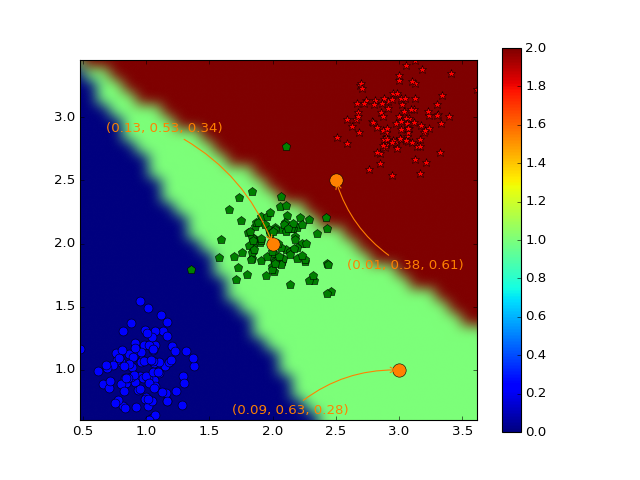

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

values_proba_logi_1 = np.exp(clf.predict_log_proba(display_1))[0]
values_proba_logi_2 = np.exp(clf.predict_log_proba(display_2))[0]
values_proba_logi_3 = np.exp(clf.predict_log_proba(display_3))[0]

fig4 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)

plt.annotate(r'' + '(%.2f' % values_proba_logi_1[0] + ', %.2f'
             % values_proba_logi_1[1] + ', %.2f)' % values_proba_logi_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, +100),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_logi_2[0] + ', %.2f'
             % values_proba_logi_2[1] + ', %.2f)' % values_proba_logi_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_logi_3[0] + ', %.2f'
             % values_proba_logi_3[1] + ', %.2f)' % values_proba_logi_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

## Exercise: Are LogisticRegression and LDA the same on this example?

## Exercise: investigate http://nbviewer.ipython.org/github/cs109/content/blob/master/labs/lab4/Lab4full.ipynb (Part 2)

What do you think is the C parameter?

Determine its influence, by changing its value


# PART V: K-Nearest Neighboors (KNN)

<IPython.core.display.Javascript object>


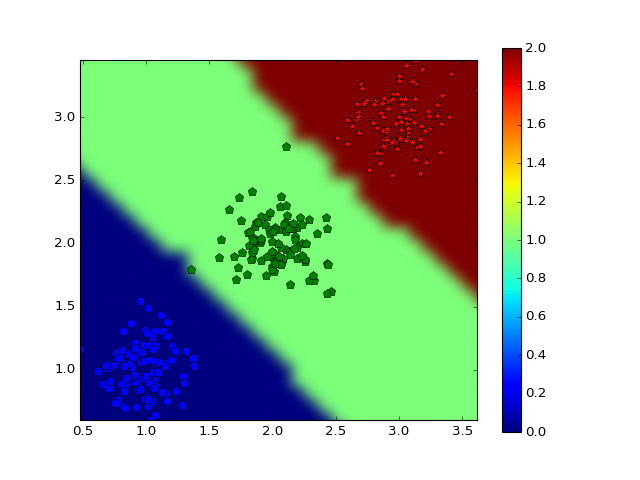

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

fig5 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1,-1)), X, step=resolution_param)
plt.show()

In [ ]:
# BEWARE: now it's not that easy to get the probability estimates

## Exercice : change the number of neighboors considered in the previous exemple. What is defaut value in KNeighborsClassifier?

## Exercice: perform a comparison between knn and Logistic Regression on IRIS, using the same training/testing set with ratio 80%/20%. 